In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [2]:
from torchvision.datasets import MNIST
from torchvision import transforms

In [3]:
train = MNIST("~/GOTO2018/Conv/imgs", transform=transforms.Compose([transforms.ToTensor()]))
test = MNIST("~/GOTO2018/Conv/imgs", transform=transforms.Compose([transforms.ToTensor()]), train=False)

In [4]:
from tqdm import tqdm

In [14]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 5, stride=3, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 2, stride=2, padding=1),
            nn.Tanh()
        )
        
    def forward(self, X):
        return self.decoder(self.encoder(X))
        

In [15]:
auto_encoder = AutoEncoder()

In [16]:
opt = torch.optim.Adam(auto_encoder.parameters())

In [17]:
def mse_loss(pred, target):
    return torch.sum((pred - target)**2) / pred.data.nelement()

In [18]:
from tqdm import tnrange

In [19]:
import numpy as np

In [20]:
train_load = DataLoader(train, batch_size=20, shuffle=True)
test_load = DataLoader(test, batch_size=20, shuffle=True)

In [55]:
n = 5
for epoch in range(n):
    for img, _ in tqdm(rain_load):
        pred = auto_encoder(img)
        loss = mse_loss(img, pred)
        
        loss.backward()
        
        opt.step()
        opt.zero_grad()
    
    L = 0
    for img, _ in tqdm(test_load):
        L += float(mse_loss(img, auto_encoder(img)))
    print('epoch {0}, train_loss:{1}, test_loss:{2}'.format(epoch + 1, loss.data[0], L/500))
        

In [23]:
import matplotlib.pyplot as plt

In [57]:
imgs_test = [img for img, _ in test_load]

In [58]:
from IPython.display import clear_output
from time import sleep

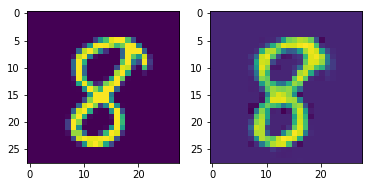

In [61]:
for i in range(100):
    idx = np.random.randint(0, 500)
    plt.subplot(1, 2, 1)
    plt.imshow(imgs_test[idx].detach().numpy()[0][0]) 
    plt.subplot(1, 2, 2)
    plt.imshow(auto_encoder(imgs_test[idx]).detach().numpy()[0][0])
    plt.show()
    sleep(0.5)
    clear_output(True)